In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

Gross domestic product (GDP) is the value of the goods and services produced by the nation's economy less the value of the goods and services used up in production. GDP is also equal to the sum of personal consumption expenditures, gross private domestic investment, net exports of goods and services, and government consumption expenditures and gross investment. Real values are inflation-adjusted estimates—that is, estimates that exclude the effects of price changes.

-Plot the time series, along with any logical or necessary differences to get a stationary dataset

-Generate and interpret a PACF for the time series (and/or its differences)

-Generate 5 ARIMA specifications and evaluate their efficacy at modeling your data

-Finally choose one specification and make the case for that as a logical model for your dataset.

In [2]:
gdp_df = pd.read_csv('GDP.csv')
# Remove NA's
gdp_df.dropna(inplace=True)

In [3]:
gdp_df.head(9)

,DATE,A191RL1Q225SBEA
0,1947-04-01,-1.0
1,1947-07-01,-0.8
2,1947-10-01,6.4
3,1948-01-01,6.2
4,1948-04-01,6.8
5,1948-07-01,2.3
6,1948-10-01,0.4
7,1949-01-01,-5.4
8,1949-04-01,-1.4


In [4]:
gdp_df.info()
gdp_df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291 entries, 0 to 290
Data columns (total 2 columns):
DATE               291 non-null object
A191RL1Q225SBEA    291 non-null float64
dtypes: float64(1), object(1)
memory usage: 6.8+ KB


(291, 2)

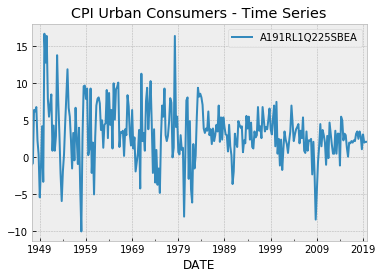

In [5]:
plt.style.use('bmh')
gdp_df.index = pd.to_datetime(gdp_df.DATE)
gdp_df.plot()
plt.title('CPI Urban Consumers - Time Series')
plt.show()

Our GDP is not stationary let's take a look from 1949 to 2019 it's a rollorcoster and very unstable.

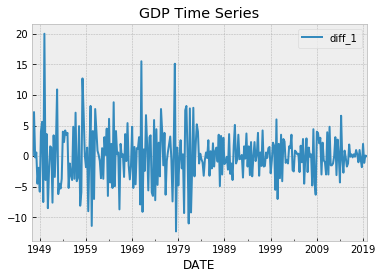

In [6]:
# bringing our data close together
gdp_df["diff_1"] = gdp_df.A191RL1Q225SBEA - gdp_df.A191RL1Q225SBEA.shift()
gdp_df.plot(y='diff_1')
plt.title("GDP Time Series")
plt.show()

Our data looks more stable sometime after 1979.

Text(0.5, 1.0, 'GDP PACF')

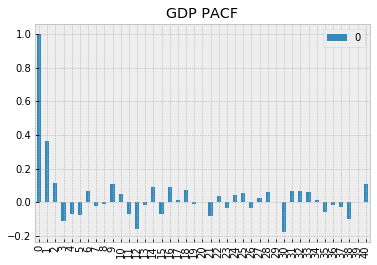

In [7]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(gdp_df.A191RL1Q225SBEA))
x_acf.plot(kind='bar')
plt.title("GDP PACF")

Our first GDP PACF series has some autocorrelation that is not too storng but, but very visible.

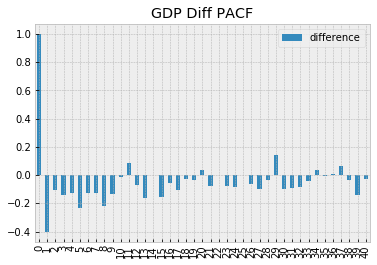

In [8]:
x_acf = pd.DataFrame(pacf(gdp_df.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("GDP Diff PACF")
plt.legend(['difference'])

The differences seems to show some autocorrelation also. We will build a few ARIMA models to experiment to our analysis.

Below we will build a few series of models to evaluate each with different parameters for our ARIMA.
the parameteres are passed in (p, d, q) order, corresponding to the AR, I, and MA portions respectively.
Recall how we interpret those attributes. The AR is the past values, I is the level of differencing, and MA is adjusting to past errors.

In [9]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(gdp_df.A191RL1Q225SBEA, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:      D.A191RL1Q225SBEA   No. Observations:                  290
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -836.655
Method:                           css   S.D. of innovations              4.332
Date:                Tue, 28 Apr 2020   AIC                           1677.310
Time:                        22:26:18   BIC                           1684.649
Sample:                    07-01-1947   HQIC                          1680.250
                         - 10-01-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0107      0.254      0.042      0.966      -0.488       0.509
Residuals Description
count    2.900000e+02
mean     1.328439e-16
std      4.339700e+00
min     -1.231069e+01
25%     -2.785690e+00

/Users/kingcheneyon/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/kingcheneyon/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In [16]:
residuals_010 = pd.DataFrame(model_fit.resid)


In [17]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(gdp_df.A191RL1Q225SBEA, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:        A191RL1Q225SBEA   No. Observations:                  291
Model:                     ARMA(1, 0)   Log Likelihood                -783.343
Method:                       css-mle   S.D. of innovations              3.571
Date:                Tue, 28 Apr 2020   AIC                           1572.687
Time:                        22:40:06   BIC                           1583.707
Sample:                    04-01-1947   HQIC                          1577.102
                         - 10-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.1949      0.326      9.791      0.000       2.555       3.835
ar.L1.A191RL1Q225SBEA     0.3598      0.055      6.580      0.000       0.253       0.467
        

/Users/kingcheneyon/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In [34]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(gdp_df.A191RL1Q225SBEA, order=(0,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:      D.A191RL1Q225SBEA   No. Observations:                  290
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -802.772
Method:                       css-mle   S.D. of innovations              3.849
Date:                Tue, 28 Apr 2020   AIC                           1611.543
Time:                        23:21:05   BIC                           1622.553
Sample:                    07-01-1947   HQIC                          1615.954
                         - 10-01-2019                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0008      0.061      0.014      0.989      -0.118       0.120
ma.L1.D.A191RL1Q225SBEA    -0.7349      0.163     -4.502      0.000      -1.055      -0.415


/Users/kingcheneyon/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/kingcheneyon/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In [35]:
model_211 = ARIMA(gdp_df['A191RL1Q225SBEA'], order=(2,1,1))
model_211_fit = model_211.fit()
print(model_211_fit.summary())
print('Residuals Description')
print(model_211_fit.resid.describe())

/Users/kingcheneyon/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/kingcheneyon/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:      D.A191RL1Q225SBEA   No. Observations:                  290
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -779.909
Method:                       css-mle   S.D. of innovations              3.533
Date:                Tue, 28 Apr 2020   AIC                           1569.819
Time:                        23:21:11   BIC                           1588.168
Sample:                    07-01-1947   HQIC                          1577.170
                         - 10-01-2019                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0076      0.004     -1.811      0.070      -0.016       0.001
ar.L1.D.A191RL1Q225SBEA     0.3093      0.059      5.287      0.000       0.195       0.424


In [36]:
from statsmodels.tsa.arima_model import ARIMA
model_111 = ARIMA(gdp_df.A191RL1Q225SBEA, order=(1,1,1))
model_111_fit = model_111.fit()
print(model_111_fit.summary())
print('Residuals Description')
print(model_111_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:      D.A191RL1Q225SBEA   No. Observations:                  290
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -781.525
Method:                       css-mle   S.D. of innovations              3.552
Date:                Tue, 28 Apr 2020   AIC                           1571.050
Time:                        23:21:12   BIC                           1585.729
Sample:                    07-01-1947   HQIC                          1576.931
                         - 10-01-2019                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0077      0.004     -2.048      0.041      -0.015      -0.000
ar.L1.D.A191RL1Q225SBEA     0.3443      0.056      6.203      0.000       0.235       0.453


/Users/kingcheneyon/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/kingcheneyon/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In [39]:
from statsmodels.tsa.arima_model import ARIMA
model_515 = ARIMA(gdp_df.A191RL1Q225SBEA, order=(5,1,5))
model_515_fit = model.fit()
print(model_515_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/Users/kingcheneyon/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/kingcheneyon/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:      D.A191RL1Q225SBEA   No. Observations:                  290
Model:                 ARIMA(5, 1, 5)   Log Likelihood                -770.557
Method:                       css-mle   S.D. of innovations              3.371
Date:                Tue, 28 Apr 2020   AIC                           1565.113
Time:                        23:31:20   BIC                           1609.152
Sample:                    07-01-1947   HQIC                          1582.758
                         - 10-01-2019                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0077      0.004     -2.087      0.037      -0.015      -0.000
ar.L1.D.A191RL1Q225SBEA    -1.2258      0.059    -20.751      0.000      -1.342      -1.110


/Users/kingcheneyon/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Neither of these models is great however the model with the lowest AIC is the (5,1,5) ARIMA at 1569 meaning it contains much of the variance. I believe it is saying that the difference in the gdp price from a day to the next will go up around 2.5 cents per day. Lets take a look at the residuals of the lowest AIC ARIMA model to see if there is any seasonality to them.

Text(0.5, 1.0, 'Histogram of Residuals')

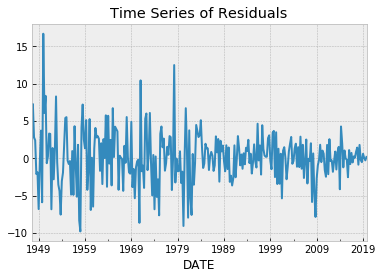

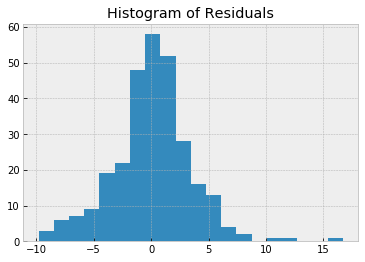

In [40]:
residuals = pd.DataFrame(model_515_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

There's not much of a change in trend  and our residuals seems to be close to normal than not according to our histogram. Although more data falls to the left and we see the long tail to the right(left skeweed) perhaps it could be outliers.